<a href="https://colab.research.google.com/github/ShubhamKNIT/learn-python/blob/main/notebooks/03_intro_to_cv_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to CNN wih TF

## Get the data
- Source of Data: Food 101 dataset, but only 2 labels are used for our problem.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-08-09 18:44:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 142.250.99.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   183MB/s    in 0.6s    

2024-08-09 18:44:44 (183 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the Data (become one with data)
And for CV visulizing many samples of the data as possible

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in pizza_steak")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak
There are 0 directories and 250 images in pizza_steak
There are 0 directories and 250 images in pizza_steak
There are 2 directories and 0 images in pizza_steak
There are 0 directories and 750 images in pizza_steak
There are 0 directories and 750 images in pizza_steak


In [6]:
!ls -al pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Aug  9 18:44 .
drwxr-xr-x 1 root root 4096 Aug  9 18:44 ..
drwxr-xr-x 4 root root 4096 Aug  9 18:44 test
drwxr-xr-x 4 root root 4096 Aug  9 18:44 train


In [7]:
len(os.listdir("pizza_steak/train/pizza"))

750

### Visulize the images
- First let's get the class names programmitically.
- Plot random images of differnet class

In [8]:
class_names = os.listdir("pizza_steak/train")
class_names.sort()
print(class_names)

['pizza', 'steak']


In [9]:
# Let's visulize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # complete path of folder
    target_folder = target_dir + "/" + target_class

    # select random images
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # read and plot images
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    # show image shape
    print(f"Shape: {img.shape}")
    return img

['523535.jpg']
Shape: (512, 512, 3)


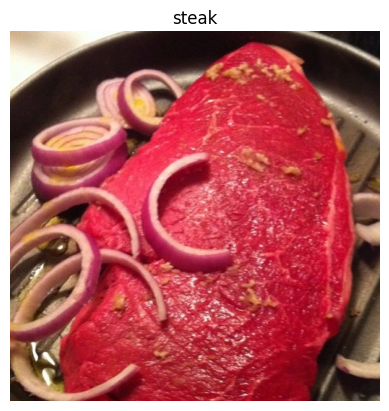

In [10]:
img = view_random_image("pizza_steak/train", "steak")

In [11]:
def view_16_random_images(target_dir, target_class):
    target_folder = target_dir + "/" + target_class

    random_images = random.sample(os.listdir(target_folder), 16)

    fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(16, 16))
    for i in range(4):
        for j in range(4):
            img = mpimg.imread(target_folder + "/" + random_images[i * 4 + j])
            ax[i, j].imshow(img)
            ax[i, j].set_title(f"{random_images[i * 4 + j]}, shape: {img.shape}")
            ax[i, j].axis("off")

    plt.show()

In [12]:
view_16_random_images("pizza_steak/train", "pizza")

Output hidden; open in https://colab.research.google.com to view.

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[209, 177, 136],
        [209, 177, 136],
        [208, 176, 135],
        ...,
        [ 14,  14,  16],
        [ 15,  15,  17],
        [ 15,  15,  17]],

       [[209, 177, 136],
        [209, 177, 136],
        [209, 177, 136],
        ...,
        [ 19,  19,  21],
        [ 18,  18,  20],
        [ 16,  16,  18]],

       [[207, 175, 136],
        [207, 175, 136],
        [207, 175, 136],
        ...,
        [ 22,  20,  23],
        [ 20,  18,  21],
        [ 17,  15,  18]],

       ...,

       [[ 55,  38,  20],
        [ 57,  40,  22],
        [ 59,  42,  26],
        ...,
        [119, 105,  79],
        [130, 116,  90],
        [136, 122,  95]],

       [[ 58,  40,  20],
        [ 61,  43,  23],
        [ 62,  45,  27],
        ...,
        [125, 111,  84],
        [130, 114,  88],
        [134, 119,  90]],

       [[ 61,  43,  23],
        [ 64,  46,  26],
        [ 64,  47,  29],
        ...,
        [127, 113,  8

In [14]:
img.shape

(512, 512, 3)

In [15]:
img/255.

array([[[0.81960784, 0.69411765, 0.53333333],
        [0.81960784, 0.69411765, 0.53333333],
        [0.81568627, 0.69019608, 0.52941176],
        ...,
        [0.05490196, 0.05490196, 0.0627451 ],
        [0.05882353, 0.05882353, 0.06666667],
        [0.05882353, 0.05882353, 0.06666667]],

       [[0.81960784, 0.69411765, 0.53333333],
        [0.81960784, 0.69411765, 0.53333333],
        [0.81960784, 0.69411765, 0.53333333],
        ...,
        [0.0745098 , 0.0745098 , 0.08235294],
        [0.07058824, 0.07058824, 0.07843137],
        [0.0627451 , 0.0627451 , 0.07058824]],

       [[0.81176471, 0.68627451, 0.53333333],
        [0.81176471, 0.68627451, 0.53333333],
        [0.81176471, 0.68627451, 0.53333333],
        ...,
        [0.08627451, 0.07843137, 0.09019608],
        [0.07843137, 0.07058824, 0.08235294],
        [0.06666667, 0.05882353, 0.07058824]],

       ...,

       [[0.21568627, 0.14901961, 0.07843137],
        [0.22352941, 0.15686275, 0.08627451],
        [0.23137255, 0

`Note`: We need to preprocess the image before feeding it to model
1. Conver images to numbers.
2. Normalize the image by dividing it by 255(rgb max pixel is 256).

## An example end-to-end steps we're going to follow
1. Load our images
2. Preprocess images
3. Build a CNN
4. Compile and fit the CNN

In [16]:
# set the seed
tf.random.set_seed(7)

# Preprocess data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_dategen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Setup paths
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=7)
valid_data = train_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=7)

# Build a CNN model (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=valid_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 517ms/step - accuracy: 0.6321 - loss: 0.6332 - val_accuracy: 0.8200 - val_loss: 0.4382
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.8029 - loss: 0.4456 - val_accuracy: 0.8520 - val_loss: 0.3715
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7985 - loss: 0.4404 - val_accuracy: 0.8400 - val_loss: 0.3720
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.8395 - loss: 0.4024 - val_accuracy: 0.8560 - val_loss: 0.3373
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8453 - loss: 0.3715 - val_accuracy: 0.8600 - val_loss: 0.3404


In [17]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Replicating TF Playground Model for Binary Classification

In [ ]:
tf.random.set_seed(7)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ['accuracy']
)

history_2 = model_2.fit(
    train_data,
    epochs = 5,
    validation_data = valid_data
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.5056 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.5081 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.5258 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

## Read the Paper on CNN
<a href="https://arxiv.org/pdf/1511.08458">CNN Explained</a>

Key Points of Paper:
- After reading this paper, you will find many answer why CNN are used instead of ANN for finding pattern in image classification and object detection.
- CNN performs better even with less number of trainable paramaeters than any ANN (as seen above).
- Conv layers helps NN create features and filters
- Pooling layers reduce the dimesionality. If we use pool2d with `pool_size = 2`, it will reduce the volume by `50% without stride (strid = 1)`, if `stride = 2`, then reduction 50%.
- In paper it is advised keep the dimension of input layer to be recursively divisible by 2.
- For smaller dimension data set `stride = 1(default)`, set the `stride =2 ` when we need to extract large number of features from data.
- Stride basically slides the axis after each cell calculation by help of kernel weights to form pool <a href="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*enNRmTsmTtzbS5MI9-xmLg.png">Pool calculation image</a>. In image, `kernel=3`,`stride=1`. So, `input size = (6, 6), after pooing becomes output size = (4, 4).`
- Do not increase kernel size beyond 3, because of destructive nature of stride.
- Stride basically slides after each calculation. So, inconsistency due to stride and kernel might lead to feature destruction.

`🔑 Note`: `Always use some kind of paper or model as baseline while building any machine learning projects`

## Binary Classification: End-to-end Deep Learning

Steps we're going to follow:
1. Understand the data by visulizing them.
2. Preprocess the data
3. Build, compile, fit, and evaluate the model
4. Experiment a lot with model architecture and visualize the loss and accuracy

### Load Data

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

### Data Visulization

In [19]:
def view_random_image_from_ds(dataset):
    plt.figure(figsize=(10, 10))
    images, labels = next(dataset)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

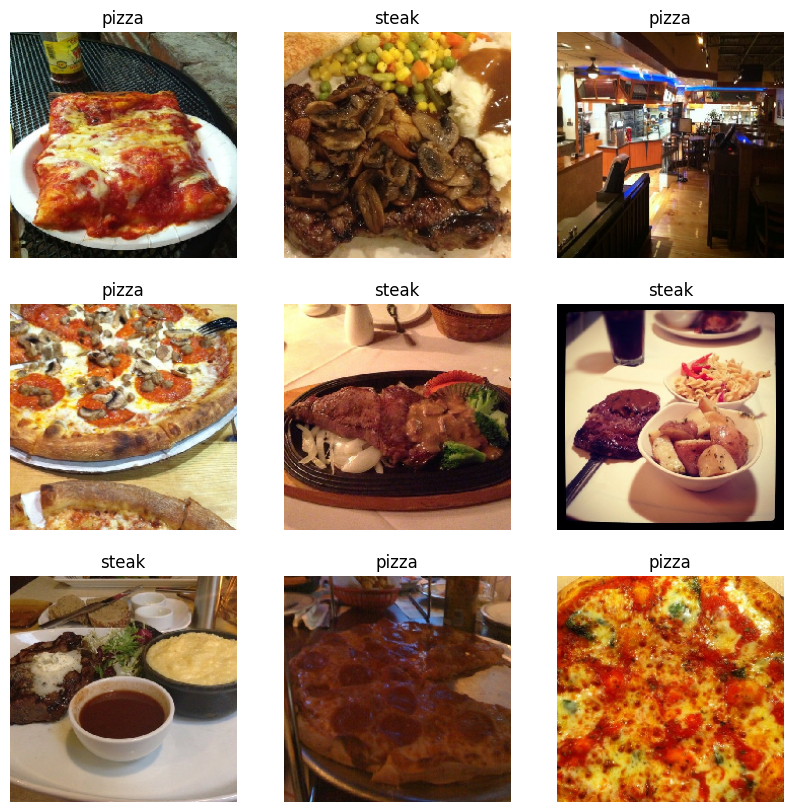

In [ ]:
view_random_image_from_ds(train_data)

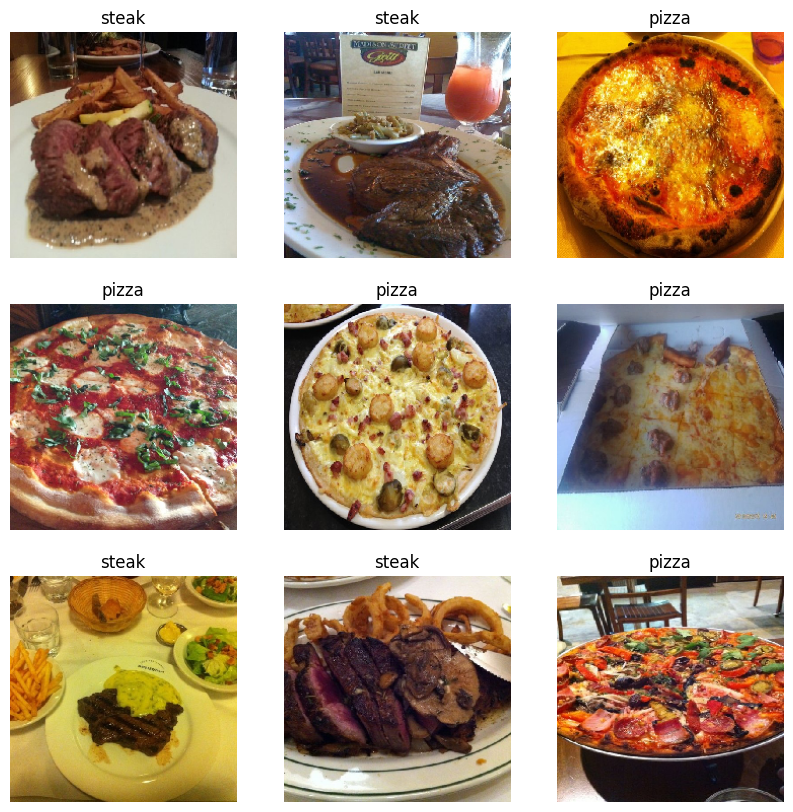

In [ ]:
view_random_image_from_ds(test_data)

In [ ]:
images[3]

array([[[0.01176471, 0.        , 0.01568628],
        [0.10588236, 0.01960784, 0.03137255],
        [0.10588236, 0.01176471, 0.        ],
        ...,
        [0.01176471, 0.01568628, 0.03529412],
        [0.01176471, 0.01960784, 0.01568628],
        [0.01176471, 0.01176471, 0.04313726]],

       [[0.04313726, 0.04705883, 0.        ],
        [0.57254905, 0.41960788, 0.30588236],
        [0.68235296, 0.43137258, 0.24313727],
        ...,
        [0.01568628, 0.01960784, 0.03529412],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0.01568628, 0.03921569]],

       [[0.06666667, 0.04313726, 0.        ],
        [0.74509805, 0.4784314 , 0.34117648],
        [0.9490197 , 0.50980395, 0.2509804 ],
        ...,
        [0.02352941, 0.01960784, 0.03921569],
        [0.02745098, 0.01960784, 0.02352941],
        [0.02745098, 0.01960784, 0.03921569]],

       ...,

       [[0.01176471, 0.00784314, 0.03921569],
        [0.01176471, 0.00784314, 0.03921569],
        [0.01176471, 0

### Createing a CNN Model (start :with baseline)

- Always start with simple model and see if works with your data. Then proceed forward to increase the complexity of model for better prediction.

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten
from tensorflow.keras import Sequential

In [ ]:
model_3 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_3.compile(
    loss = ['binary_crossentropy'],
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_3  = model_3.fit(train_data,
                         epochs = 5,
                         validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.5704 - loss: 2.0264 - val_accuracy: 0.7200 - val_loss: 0.5396
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.7797 - loss: 0.4860 - val_accuracy: 0.7940 - val_loss: 0.4319
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8486 - loss: 0.3716 - val_accuracy: 0.8220 - val_loss: 0.3847
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8749 - loss: 0.3154 - val_accuracy: 0.8300 - val_loss: 0.4013
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9460 - loss: 0.1722 - val_accuracy: 0.8040 - val_loss: 0.4555


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

In [21]:
import pandas as pd
def plot_history(history):
    history = pd.DataFrame(history.history)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(history['accuracy'], label = 'train-accuracy', c = 'red')
    ax[0].plot(history['val_accuracy'], label = 'val-accuracy', c = 'green')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(history['loss'], label = 'train-loss', c = 'red')
    ax[1].plot(history['val_loss'], label = 'val-loss', c = 'green')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

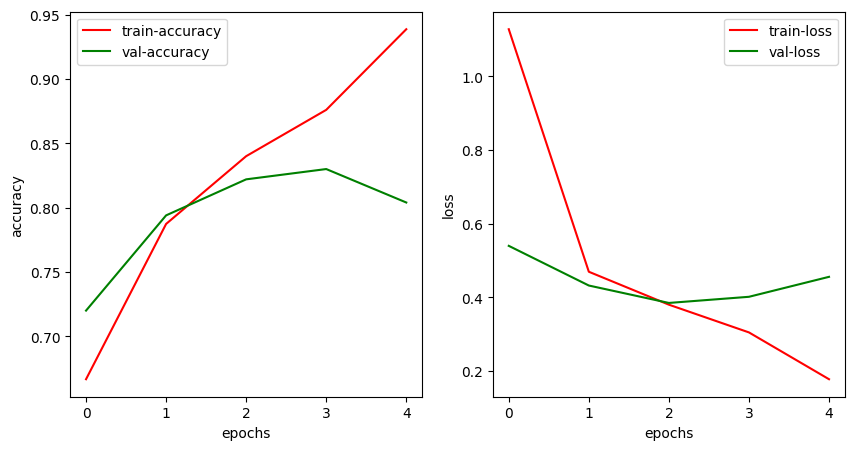

In [ ]:
plot_history(history_3)

`🔑 Note:` We can see the overfitting of the model as the loss is rising after 2 epochs training. It means model is learning too model and generalization of the model on new data might be really bad.

### 6. Adjusting model parameters

Fitting a ml model can be breakdown into 3 steps:
1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting
- Increase number of conv layers.
- Increase number of conv filters.
- Add another dense layer to the output of the flattened layer.

Reduce Overfitting
- Introduce data augmentation
- Add regularization such as (MaxPool2D)
- Add more data...

`🔑 Note`: Reducing overfitting is also known as regularization

In [ ]:
model_4 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_4.compile(
    loss = ['binary_crossentropy'],
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_4 = model_4.fit(train_data,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.5886 - loss: 0.6651 - val_accuracy: 0.7860 - val_loss: 0.4734
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.7723 - loss: 0.5050 - val_accuracy: 0.8260 - val_loss: 0.4074
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.7962 - loss: 0.4332 - val_accuracy: 0.8320 - val_loss: 0.3793
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8314 - loss: 0.3932 - val_accuracy: 0.8280 - val_loss: 0.3856
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.8377 - loss: 0.3859 - val_accuracy: 0.8060 - val_loss: 0.4090


`🔑 Note:` Conv layers are extracting features from data, and MaxPool is used for taking out the important feature from the data.

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

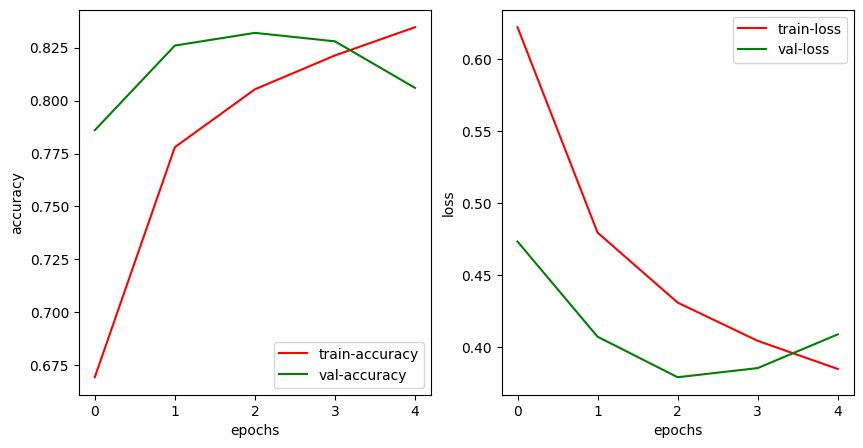

In [ ]:
plot_history(history_4)

### Data Augmentation

Data augmentation is used to introduce/increase the diversity in data for better generalization of pattern by model. Data augmentation for image can be done by rotation, translation, zooming, contrast change, brightness, flips, etc.

`Data augmentation can also be seen as looking at the same data with different perspective.`

`🔑 Note`: Always perform data augmentation on training set only

In [ ]:
# create ImageDataGenerator training with data augmentation
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)

# IDG of train w/o augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# IDG of test w/o augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented training data:")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       shuffle=False)

print("Non-Augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Non-Augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size = 32,
                                             class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented test data:
Found 500 images belonging to 2 classes.


### Visualizing augmented data

In [22]:
import numpy as np
def visualize_augmentation(dataset_aug, dataset):
  images_aug, labels_aug = next(dataset_aug)
  images, labels = next(dataset)

  li = np.random.randint(0, 32, size=5)

  # Plot augmented images
  fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
  for i, j in enumerate(li):
    ax[0, i].imshow(images_aug[j])
    ax[0, i].set_title(f"Augmented - {class_names[int(labels_aug[j])]}")
    ax[0, i].axis("off")

  # Plot original images
  for i, j in enumerate(li):
    ax[1, i].imshow(images[j])
    ax[1, i].set_title(f"Original - {class_names[int(labels[j])]}")
    ax[1, i].axis("off")

  plt.tight_layout()
  plt.show()

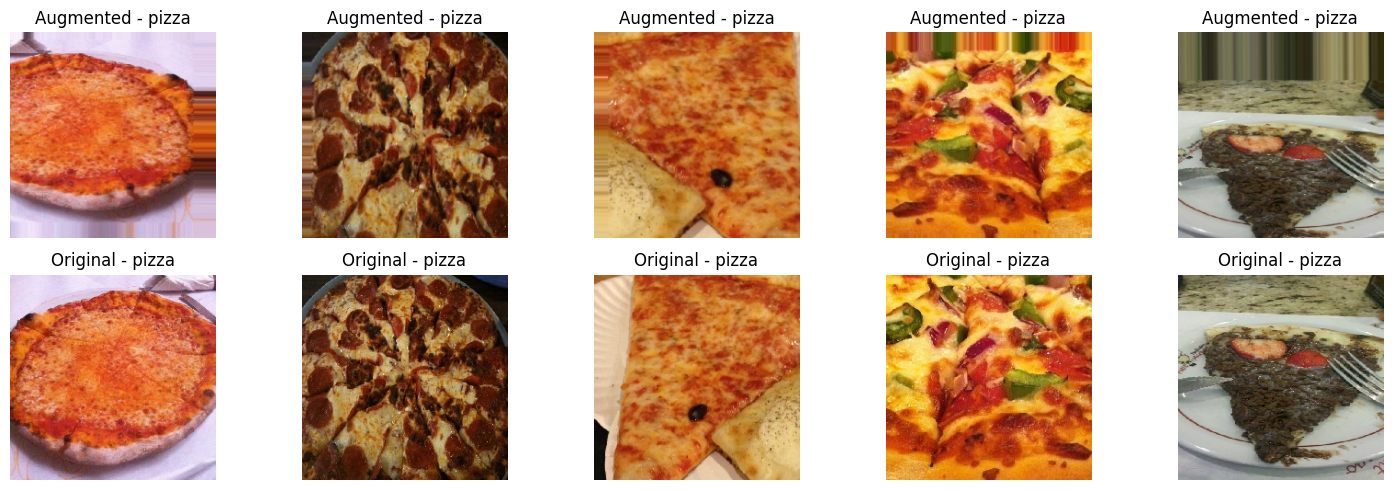

In [ ]:
visualize_augmentation(train_data_aug, train_data)

### Creating Model for Augmented Data

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(
    loss = ['binary_crossentropy'],
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_5 = model_5.fit(train_data_aug,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 421ms/step - accuracy: 0.3689 - loss: 0.7248 - val_accuracy: 0.5680 - val_loss: 0.6916
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 369ms/step - accuracy: 0.5965 - loss: 0.6917 - val_accuracy: 0.6340 - val_loss: 0.6805
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 374ms/step - accuracy: 0.5179 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6961
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 498ms/step - accuracy: 0.4680 - loss: 0.7158 - val_accuracy: 0.7980 - val_loss: 0.6788
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 402ms/step - accuracy: 0.6136 - loss: 0.7283 - val_accuracy: 0.5100 - val_loss: 0.6865


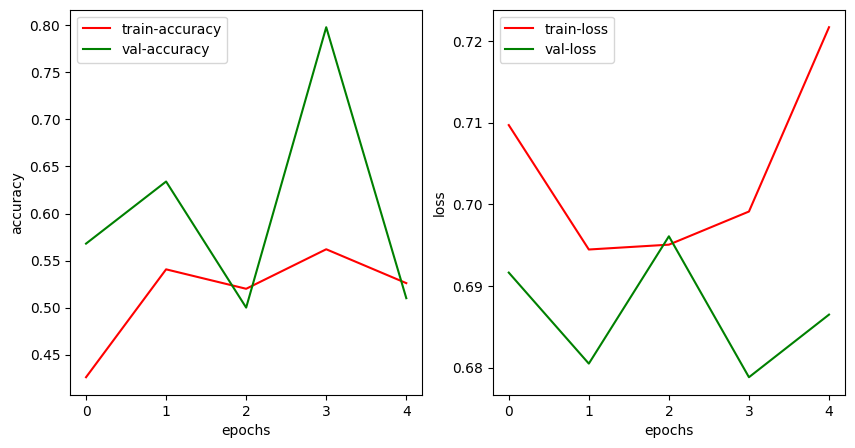

In [ ]:
plot_history(history_5)

In [ ]:
print("Augmented shuffled training data:")
train_data_aug_shuffled = train_datagen_aug.flow_from_directory(
                                                       train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       shuffle=True)

Augmented shuffled training data:
Found 1500 images belonging to 2 classes.


In [ ]:
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(
    loss = ['binary_crossentropy'],
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_6 = model_6.fit(train_data_aug_shuffled,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 424ms/step - accuracy: 0.6117 - loss: 0.6458 - val_accuracy: 0.7480 - val_loss: 0.4949
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 371ms/step - accuracy: 0.7595 - loss: 0.5086 - val_accuracy: 0.8060 - val_loss: 0.4094
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 382ms/step - accuracy: 0.7493 - loss: 0.5228 - val_accuracy: 0.8280 - val_loss: 0.3709
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 372ms/step - accuracy: 0.7955 - loss: 0.4543 - val_accuracy: 0.7920 - val_loss: 0.4221
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 374ms/step - accuracy: 0.7890 - loss: 0.4436 - val_accuracy: 0.8440 - val_loss: 0.3483


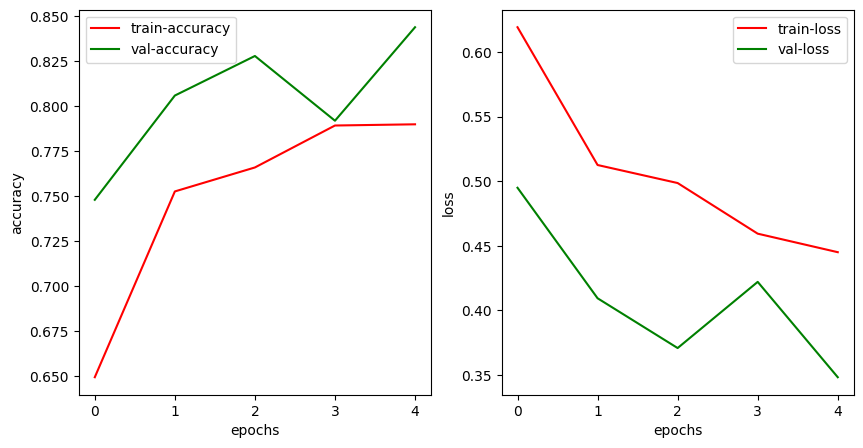

In [ ]:
plot_history(history_6)

### 7. Experimentation (till we find best model we could)

> Ways we can experiment
- Adding more layers
- Increasing the filters in Conv2D (10 to 32 or even 64)
- Train for longer
- Find an ideal learning rate
- Get more data
- Leverage the power of `transfer learning` use it for your own problem

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    patience=3,
    monitor='val_accuracy',
    verbose=1
)

In [ ]:
tf.random.set_seed(7)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(
    loss = ['binary_crossentropy'],
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_7 = model_7.fit(train_data_aug_shuffled,
                        epochs=20,
                        validation_data=test_data)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 476ms/step - accuracy: 0.5377 - loss: 0.6913 - val_accuracy: 0.6740 - val_loss: 0.6340
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 429ms/step - accuracy: 0.6372 - loss: 0.6471 - val_accuracy: 0.7920 - val_loss: 0.4519
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 382ms/step - accuracy: 0.6785 - loss: 0.6129 - val_accuracy: 0.8040 - val_loss: 0.4344
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 415ms/step - accuracy: 0.7632 - loss: 0.5124 - val_accuracy: 0.8380 - val_loss: 0.3803
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - accuracy: 0.7695 - loss: 0.5034 - val_accuracy: 0.8520 - val_loss: 0.3759
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 385ms/step - accuracy: 0.7622 - loss: 0.4955 - val_accuracy: 0.7700 - val_loss: 0.5008
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 391ms/step - accuracy: 0.7639 - loss: 0.5145 - val_accuracy: 0.8460 - val_loss: 0.3603
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 405ms/step - accuracy: 0.7786 - loss: 0.4794 - val_accu

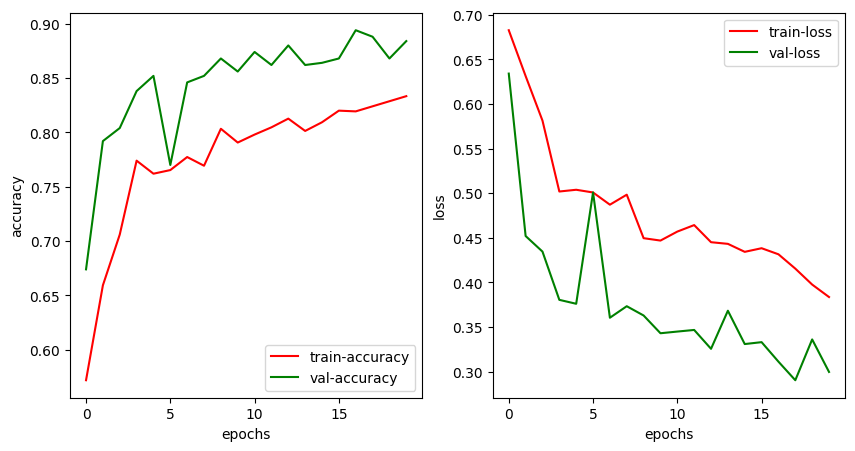

In [ ]:
plot_history(history_7)

> `🔑 Note`: Before giving new data for prediction we always require to preprocess the data beforehand.

In [ ]:
!wget https://cdn.apartmenttherapy.info/image/fetch/f_auto,q_auto:eco/https://storage.googleapis.com/gen-atmedia/3/2012/10/cb2e9502cd9da3468caa944e15527b19bce68a8e.jpeg

--2024-08-09 10:51:57--  https://cdn.apartmenttherapy.info/image/fetch/f_auto,q_auto:eco/https://storage.googleapis.com/gen-atmedia/3/2012/10/cb2e9502cd9da3468caa944e15527b19bce68a8e.jpeg
Resolving cdn.apartmenttherapy.info (cdn.apartmenttherapy.info)... 151.101.2.102, 151.101.66.102, 151.101.130.102, ...
Connecting to cdn.apartmenttherapy.info (cdn.apartmenttherapy.info)|151.101.2.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1166301 (1.1M) [image/jpeg]
Saving to: ‘cb2e9502cd9da3468caa944e15527b19bce68a8e.jpeg’

cb2e9502cd9da3468ca 100%[===================>]   1.11M  --.-KB/s    in 0.03s   

2024-08-09 10:51:57 (39.7 MB/s) - ‘cb2e9502cd9da3468caa944e15527b19bce68a8e.jpeg’ saved [1166301/1166301]



(-0.5, 1999.5, 2499.5, -0.5)

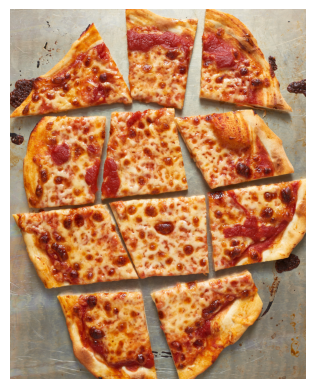

In [ ]:
import matplotlib.image as mpimg
pizza = mpimg.imread('pizza_img_1.jpeg')
plt.imshow(pizza)
plt.axis('off')

In [ ]:
pizza.shape

(2500, 2000, 3)

In [63]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename) # loading image from path
    img = tf.image.decode_image(img) # converts the encoded data into tensor
    img = tf.image.resize(img, size=(224, 224)) # resize the image
    img = img/255. # rescale the image
    return img

In [ ]:
pizza_ready = load_and_prep_image('pizza_img_1.jpeg')
pizza_ready

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6901961 , 0.6746499 , 0.62717086],
        [0.68315953, 0.6560236 , 0.6155475 ],
        [0.7010717 , 0.67754227, 0.6147972 ],
        ...,
        [0.757493  , 0.74509805, 0.6702731 ],
        [0.77237284, 0.7335809 , 0.6275596 ],
        [0.7805324 , 0.7337541 , 0.6394962 ]],

       [[0.70262605, 0.67909664, 0.61635154],
        [0.724965  , 0.71712184, 0.6582983 ],
        [0.7136555 , 0.70189077, 0.64306724],
        ...,
        [0.7878438 , 0.7436212 , 0.6799307 ],
        [0.7741595 , 0.7211483 , 0.61621135],
        [0.76866126, 0.7176809 , 0.5921907 ]],

       [[0.6935924 , 0.65906864, 0.61750704],
        [0.7123724 , 0.68492144, 0.64570576],
        [0.69611216, 0.66081804, 0.6019945 ],
        ...,
        [0.7894246 , 0.73581684, 0.61904657],
        [0.7882353 , 0.75686276, 0.6745098 ],
        [0.7856088 , 0.7424716 , 0.6593483 ]],

       ...,

       [[0.61288536, 0.6099375 , 0.5598944 ],
        [0.59

In [ ]:
pizza_ready.shape

TensorShape([224, 224, 3])

`Note`: Model gives the prediction in terms of probability

In [ ]:
x = model_7.predict(tf.expand_dims(pizza_ready, 0))
class_names[int(tf.round(x))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


'pizza'

In [24]:
def pred_and_plot(model, filename, class_names=class_names):
    # load target image and preprocess it
    img = load_and_prep_image(filename)

    # model prediction on image (prediction probability)
    pred = model.predict(tf.expand_dims(img, axis = 0))

    # getting the class name using prediction
    pred_class = class_names[int(tf.round(pred))]

    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Predicted Class: {pred_class}")
    plt.axis('off')
    plt.show();

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


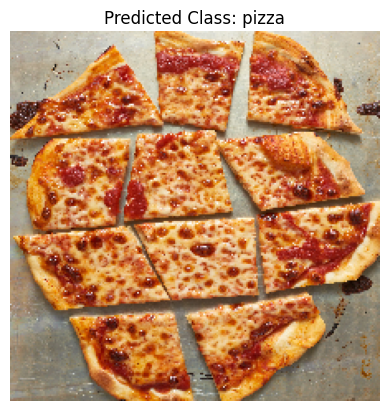

In [ ]:
pred_and_plot(model_7, 'pizza_img_1.jpeg')

In [ ]:
!wget https://edifyedmonton.com/wp-content/uploads/FnD_ColiseumFEATURE.jpg

--2024-08-09 10:57:58--  https://edifyedmonton.com/wp-content/uploads/FnD_ColiseumFEATURE.jpg
Resolving edifyedmonton.com (edifyedmonton.com)... 172.67.74.51, 104.26.11.131, 104.26.10.131, ...
Connecting to edifyedmonton.com (edifyedmonton.com)|172.67.74.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390858 (382K) [image/jpeg]
Saving to: ‘FnD_ColiseumFEATURE.jpg’

FnD_ColiseumFEATURE 100%[===================>] 381.70K  1.59MB/s    in 0.2s    

2024-08-09 10:57:59 (1.59 MB/s) - ‘FnD_ColiseumFEATURE.jpg’ saved [390858/390858]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


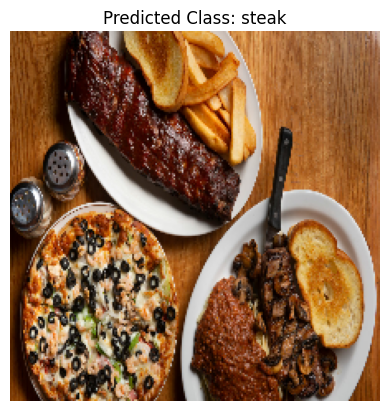

In [ ]:
pred_and_plot(model_7, 'pizza_steak.jpg')

## Multi-Class Image Classification

- Understand and Preprocess the data
- Create, fit and evaluate model
- Adjust different hyperparameters and finetune the model

### Understand and Preprocess the data

In [25]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
!unzip '10_food_classes_all_data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: 10_food_classes_all_data/train/hamburger/2119225.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._2119225.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/22923.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._22923.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/3894442.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._3894442.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/1101890.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._1101890.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/2715888.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._2715888.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/554363.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._554363.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/2100953.jpg  
  inf

In [26]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [27]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

### Get the classnames from directories

In [28]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['668711.jpg']
Shape: (512, 382, 3)


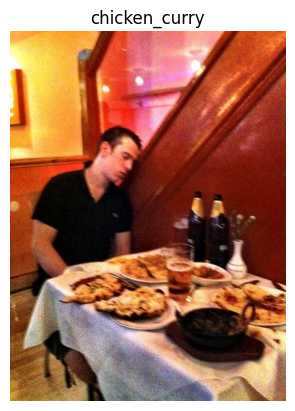

In [29]:
import random
img = view_random_image(train_dir, random.choice(class_names))

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size = 32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size = 32,
    class_mode='categorical'
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Model Building

In [ ]:
model_8 = Sequential([
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_8.compile(
    loss = ['categorical_crossentropy'],
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_8 = model_8.fit(train_data,
                        epochs = 5,
                        validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 136ms/step - accuracy: 0.1223 - loss: 2.2801 - val_accuracy: 0.2196 - val_loss: 2.1176
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 118ms/step - accuracy: 0.2344 - loss: 2.0891 - val_accuracy: 0.2704 - val_loss: 2.0297
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 138ms/step - accuracy: 0.3351 - loss: 1.9055 - val_accuracy: 0.3256 - val_loss: 1.9130
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 118ms/step - accuracy: 0.4279 - loss: 1.6863 - val_accuracy: 0.3352 - val_loss: 1.9348
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - accuracy: 0.4867 - loss: 1.5144 - val_accuracy: 0.3384 - val_loss: 1.9509


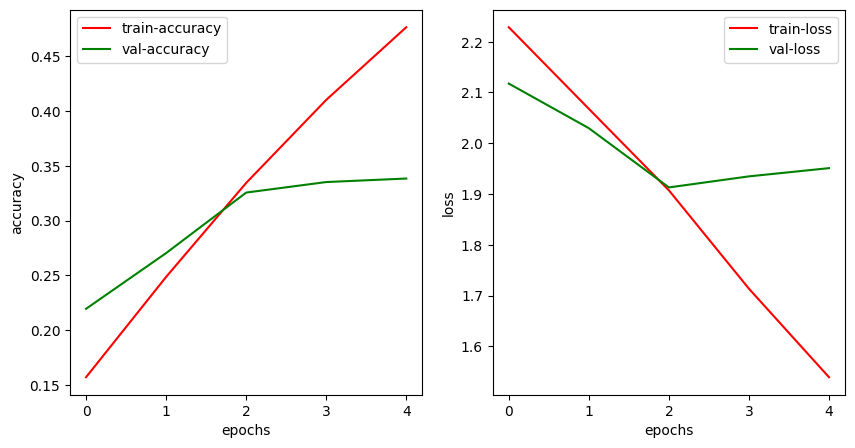

In [ ]:
plot_history(history_8)

In [ ]:
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 51, 51, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 49, 49, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 24, 24, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 5760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │          57,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,322 (731.73 KB)

 Trainable params: 62,440 (243.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 124,882 (487.82 KB)

### Finetuning the model

In [88]:
model_9 = Sequential([
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(
    loss = ['categorical_crossentropy'],
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_9 = model_9.fit(train_data,
                        epochs = 5,
                        validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 124ms/step - accuracy: 0.1227 - loss: 2.2775 - val_accuracy: 0.2068 - val_loss: 2.1603
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step - accuracy: 0.2188 - loss: 2.1073 - val_accuracy: 0.2928 - val_loss: 1.9784
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 111ms/step - accuracy: 0.3018 - loss: 1.9744 - val_accuracy: 0.3112 - val_loss: 1.9139
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.3562 - loss: 1.8788 - val_accuracy: 0.3504 - val_loss: 1.8653
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 113ms/step - accuracy: 0.3741 - loss: 1.8087 - val_accuracy: 0.3532 - val_loss: 1.8425


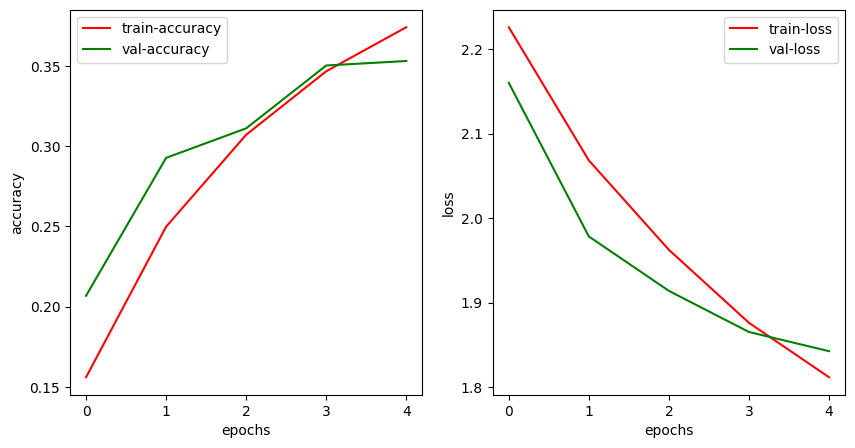

In [89]:
plot_history(history_9)

In [ ]:
model_8.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 51, 51, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 49, 49, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 24, 24, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 22, 22, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 20, 20, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 10, 10, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,982 (195.25 KB)

 Trainable params: 16,660 (65.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,322 (130.17 KB)

In [ ]:
model_10 = Sequential([
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Activation('relu'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Activation('relu'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Activation('relu'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Activation('relu'),
    Flatten(),
    Activation('relu'),
    Dense(10, activation='softmax')
])

model_10.compile(
    loss = ['categorical_crossentropy'],
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_10 = model_10.fit(train_data,
                          epochs = 5,
                          validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 135ms/step - accuracy: 0.0925 - loss: 2.3018 - val_accuracy: 0.1860 - val_loss: 2.2119
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step - accuracy: 0.1964 - loss: 2.1663 - val_accuracy: 0.2556 - val_loss: 2.0662
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.2720 - loss: 2.0575 - val_accuracy: 0.3316 - val_loss: 1.9139
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 120ms/step - accuracy: 0.3083 - loss: 1.9497 - val_accuracy: 0.3328 - val_loss: 1.8883
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.3557 - loss: 1.8569 - val_accuracy: 0.3496 - val_loss: 1.8504


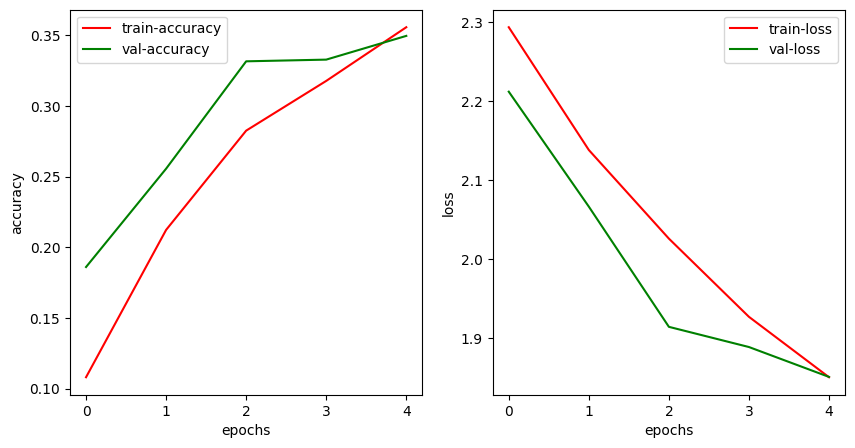

In [ ]:
plot_history(history_10)

### Reducing overfitting

- Read this [medium article](https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d) to know what are 8 ways of reducing overfitting.

- In this article you will learn to apply `kernel_regularization`: [Regularization](https://medium.com/intelligentmachines/convolutional-neural-network-and-regularization-techniques-with-tensorflow-and-keras-5a09e6e65dc7)

- Other way could be use `leverage power of transfer learning`.

- You can also do data augmentation

#### Applying Regularization

In [36]:
from tensorflow.keras import regularizers
model_11 = Sequential([
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_11.compile(
    loss = ['categorical_crossentropy'],
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_11 = model_11.fit(train_data,
                        epochs = 5,
                        validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 138ms/step - accuracy: 0.1529 - loss: 2.3357 - val_accuracy: 0.2212 - val_loss: 2.1556
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 108ms/step - accuracy: 0.2637 - loss: 2.0906 - val_accuracy: 0.2932 - val_loss: 2.0215
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.3355 - loss: 1.9528 - val_accuracy: 0.3104 - val_loss: 1.9820
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.3913 - loss: 1.7986 - val_accuracy: 0.3236 - val_loss: 1.9518
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 131ms/step - accuracy: 0.4750 - loss: 1.6057 - val_accuracy: 0.3124 - val_loss: 2.1160


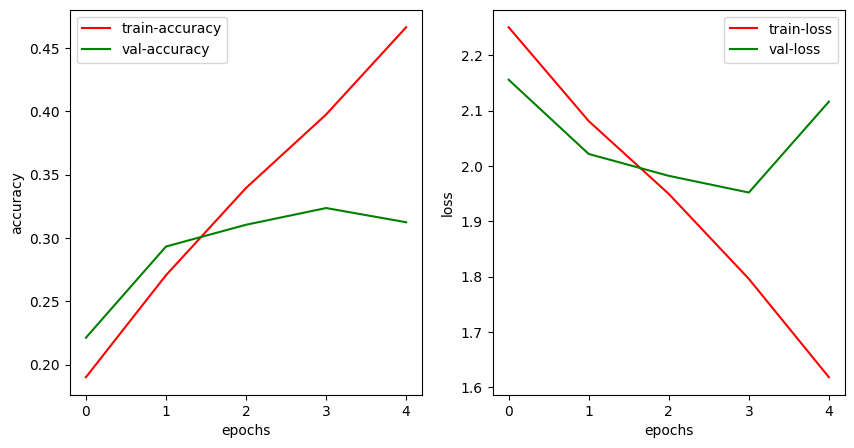

In [37]:
plot_history(history_11)

> `Note`: Regularization is not reduce overfitting.    

#### Data Augmentation

In [40]:
train_datagen_aug = ImageDataGenerator(
    rescale = (1/255.),
    rotation_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

train_datagen = ImageDataGenerator(rescale=(1/255.))
test_datagen = ImageDataGenerator(rescale=(1/255.))

train_data_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model_12 = Sequential([
    Conv2D(100, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(50, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_12.compile(
    loss = ['categorical_crossentropy'],
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_12 = model_12.fit(train_data_aug,
                          epochs = 5,
                          validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 117s 458ms/step - accuracy: 0.1363 - loss: 2.2754 - val_accuracy: 0.2344 - val_loss: 2.1065
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 129s 428ms/step - accuracy: 0.2381 - loss: 2.1132 - val_accuracy: 0.2568 - val_loss: 2.0564
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 427ms/step - accuracy: 0.2653 - loss: 2.0767 - val_accuracy: 0.3300 - val_loss: 1.9469
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 427ms/step - accuracy: 0.2960 - loss: 2.0053 - val_accuracy: 0.3708 - val_loss: 1.8320
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 442ms/step - accuracy: 0.3153 - loss: 1.9625 - val_accuracy: 0.3648 - val_loss: 1.8199


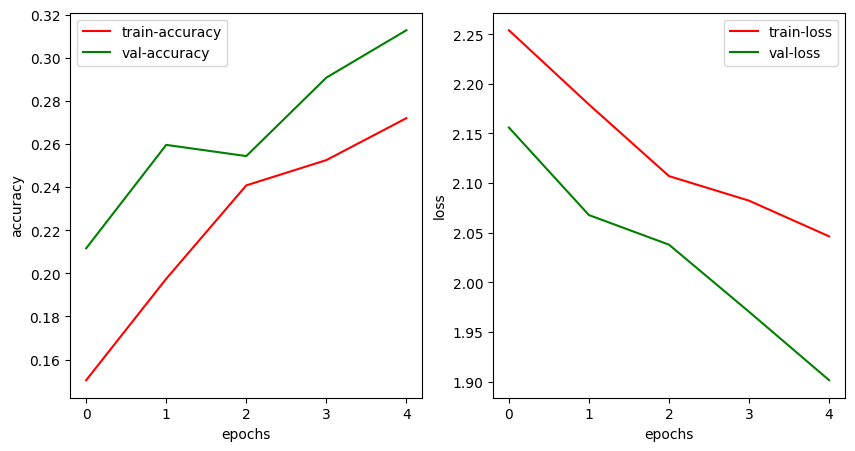

In [42]:
plot_history(history_12)

In [81]:
def pred_and_plot(model, filename, class_names=class_names):
    # load target image and preprocess it
    img = load_and_prep_image(filename)

    # model prediction on image (prediction probability)
    pred = model.predict(tf.expand_dims(img, axis = 0))

    # Muli-class if len > 1, else binary-class classification
    if (len(pred[0]) > 1):
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Predicted Class: {pred_class}")
    plt.axis('off')
    plt.show();

In [82]:
!wget https://images7.alphacoders.com/350/350913.jpg
!wget http://assets.epicurious.com/photos/57c5c6d9cf9e9ad43de2d96e/master/pass/the-ultimate-hamburger.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/6/65/Assortment_of_sushi,_May_2010.jpg

--2024-08-09 20:16:52--  https://images7.alphacoders.com/350/350913.jpg
Resolving images7.alphacoders.com (images7.alphacoders.com)... 172.67.48.187, 104.20.75.132, 104.20.76.132, ...
Connecting to images7.alphacoders.com (images7.alphacoders.com)|172.67.48.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1277190 (1.2M) [image/jpeg]
Saving to: ‘350913.jpg’

350913.jpg          100%[===================>]   1.22M  --.-KB/s    in 0.03s   

2024-08-09 20:16:52 (38.8 MB/s) - ‘350913.jpg’ saved [1277190/1277190]

--2024-08-09 20:16:52--  http://assets.epicurious.com/photos/57c5c6d9cf9e9ad43de2d96e/master/pass/the-ultimate-hamburger.jpg
Resolving assets.epicurious.com (assets.epicurious.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to assets.epicurious.com (assets.epicurious.com)|151.101.0.239|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169585 (166K) [image/jpeg]
Saving to: ‘the-ultimate-hamburger.jpg’

the-ult

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


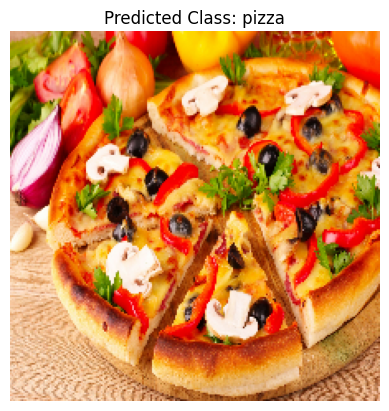

In [83]:
pred_and_plot(model_12, 'pizza.jpg', class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


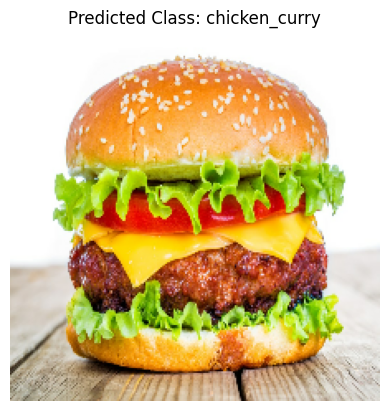

In [87]:
pred_and_plot(model_11, 'burger.jpg', class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


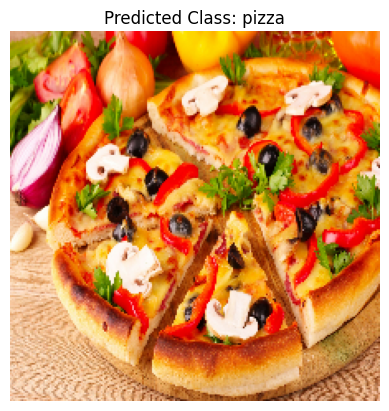

In [99]:
pred_and_plot(model_9, 'pizza.jpg', class_names)

### Save and Load Model

In [100]:
model_9.save('model_9.h5')

In [101]:
loaded_model = tf.keras.models.load_model('model_9.h5')
loaded_model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.3489 - loss: 1.8380


[1.8425430059432983, 0.3531999886035919]

In [102]:
model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.3497 - loss: 1.8217


[1.8425425291061401, 0.3531999886035919]